<a href="https://colab.research.google.com/github/SLKS99/-Physics-driven-discovery-and-optimization-of-hybrid-perovskite-films/blob/main/gpax_GPBO_priornoise_resultplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian process-based Bayesian optimization

Prepared by Maxim Ziatdinov (2022)

Imports:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
# import gpax
import numpy as np
import matplotlib.pyplot as plt

# import numpyro
# import atomai as aoi
from sklearn.metrics import mean_squared_error
import seaborn as sns

#gpax.utils.enable_x64()

In [ ]:
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.titleweight']='bold'

In [ ]:
def func(x, y=1.2):
    out = (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
        + np.e + 20
    )
    return out

def measure(x, noise):
    return func(x) + noise * np.random.randn(len(x))

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/sGP/gpax GPBO /sGP.zip', 'r')
zip_ref.extractall("/content/sGP2" )
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/sGP/gpax GPBO /sGP_noise.zip', 'r')
zip_ref.extractall("/content/sGP_noise" )
zip_ref.close()

# Analysis 1--change noise prior and kernel length

In [ ]:
os.chdir("/content/sGP2/sGP")

#here is the noise list and kernel list we used in sGP analysis
#the more detailed parameters can be found in the .py notebook in sGP folder.
noise_list = np.logspace(-1, 1, 20)
kernel_list = np.logspace(-0.8, 1, 20)

In [ ]:
noise_list

array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])

In [ ]:
kernel_list

array([ 0.15848932,  0.19712279,  0.24517359,  0.30493728,  0.37926902,
        0.47171991,  0.58670671,  0.72972276,  0.90760052,  1.12883789,
        1.40400425,  1.74624535,  2.1719114 ,  2.70133812,  3.35981829,
        4.17881006,  5.19743987,  6.46437163,  8.04013161, 10.        ])

Plot undertainty and MSE

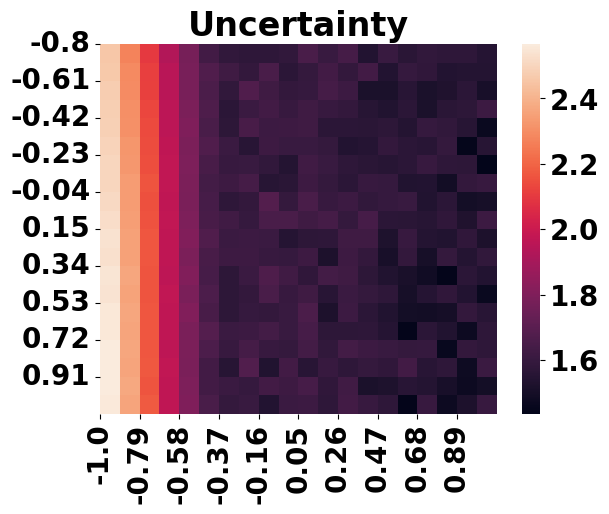

In [ ]:

from matplotlib.ticker import MultipleLocator

all_uncertainty = np.load("/content/sGP2/sGP/all_uncertainty.npy")

fig, ax = plt.subplots()
ax.set_title("Uncertainty")
ax = sns.heatmap(np.log10(all_uncertainty[-1,:,:]),
                 xticklabels=np.log10(noise_list).round(2),
                 yticklabels=np.log10(kernel_list).round(2), ax=ax)

# Set x ticks every 2nd tick
ax.xaxis.set_major_locator(MultipleLocator(2))

# Set the x-tick positions and labels
plt.xticks(np.arange(len(noise_list))[::2], np.log10(noise_list)[::2].round(2))

# Set x ticks every 2nd tick
ax.yaxis.set_major_locator(MultipleLocator(2))

# Set the x-tick positions and labels
plt.yticks(np.arange(len(kernel_list))[::2], np.log10(kernel_list)[::2].round(2))


plt.show()


In [ ]:
all_mse = np.load("/content/sGP2/sGP/all_mse.npy")
fig, ax = plt.subplots()
ax.set_title("MSE")
ax = sns.heatmap(np.log10(all_mse[-1,:,:]),
                 xticklabels=np.log10(noise_list).round(2),
                 yticklabels=np.log10(kernel_list).round(2),ax=ax)

# Set x ticks every 2nd tick
ax.xaxis.set_major_locator(MultipleLocator(2))

# Set the x-tick positions and labels
plt.xticks(np.arange(len(noise_list))[::2], np.log10(noise_list)[::2].round(2))

# Set x ticks every 2nd tick
ax.yaxis.set_major_locator(MultipleLocator(2))

# Set the x-tick positions and labels
plt.yticks(np.arange(len(kernel_list))[::2], np.log10(kernel_list)[::2].round(2))

plt.show()

IsADirectoryError: ignored

If you want to check the training process of a certain noise prior and kernel length, you can chnage the directory below

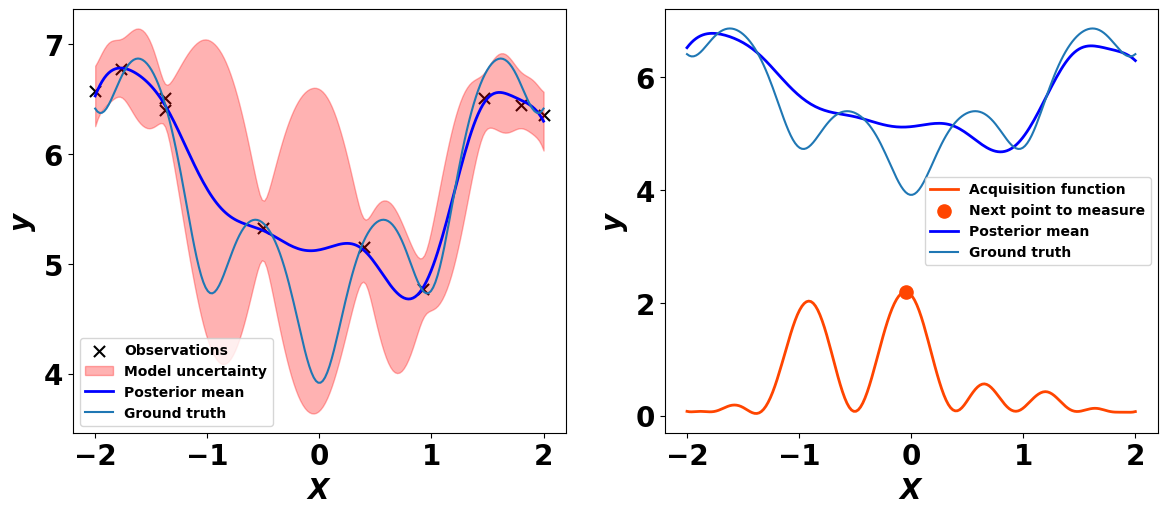

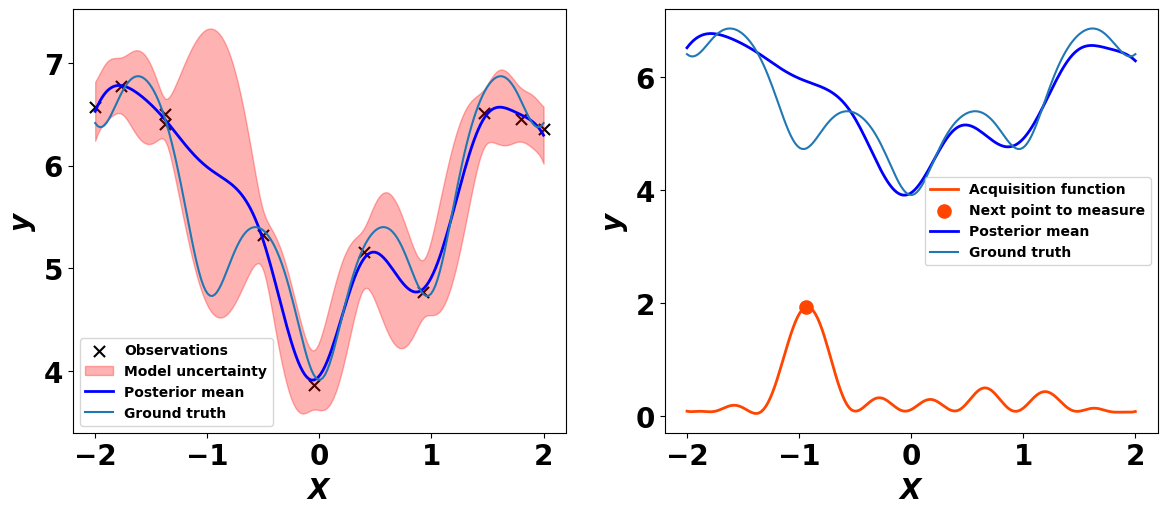

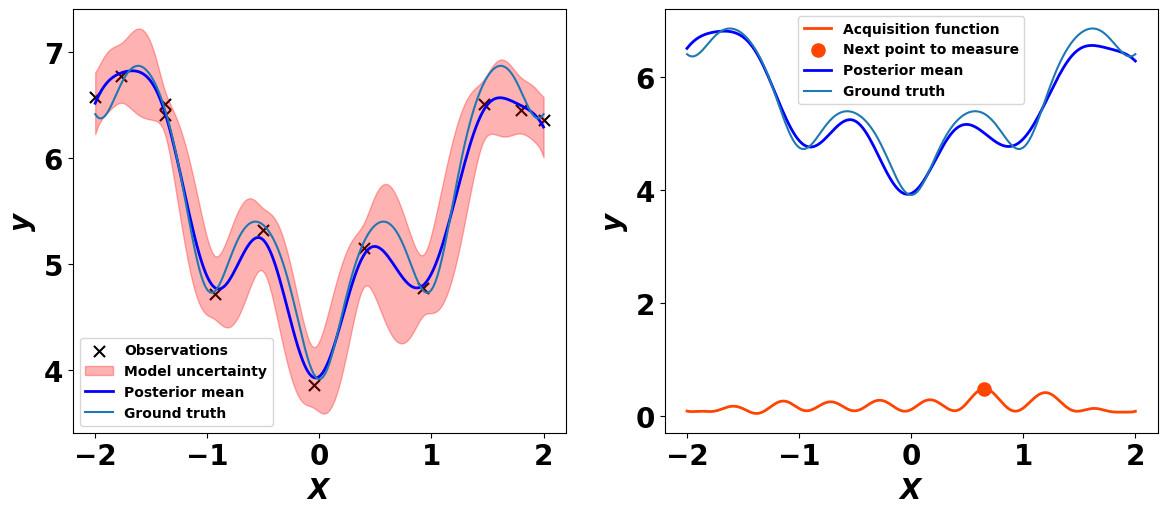

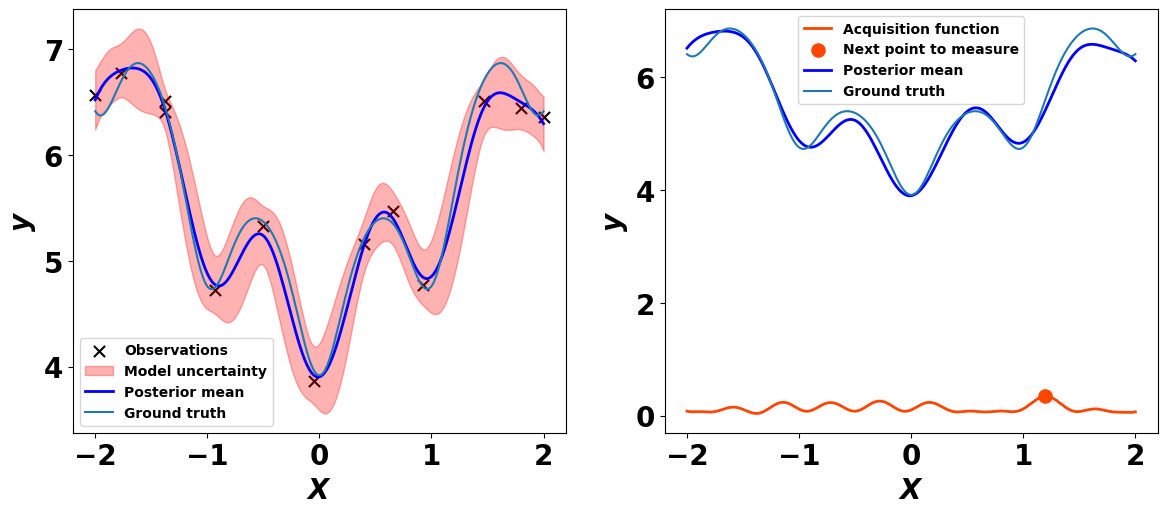

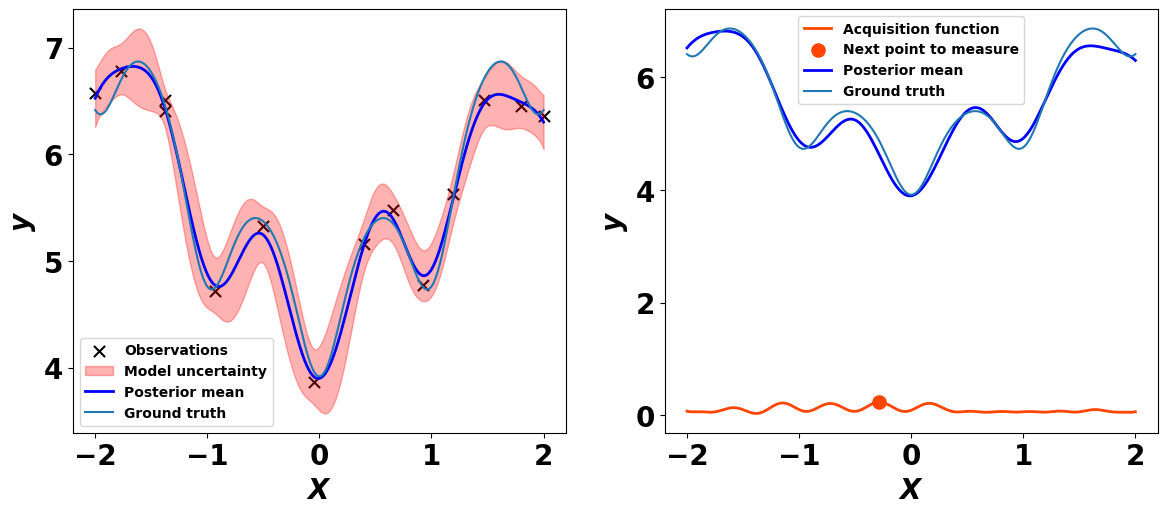

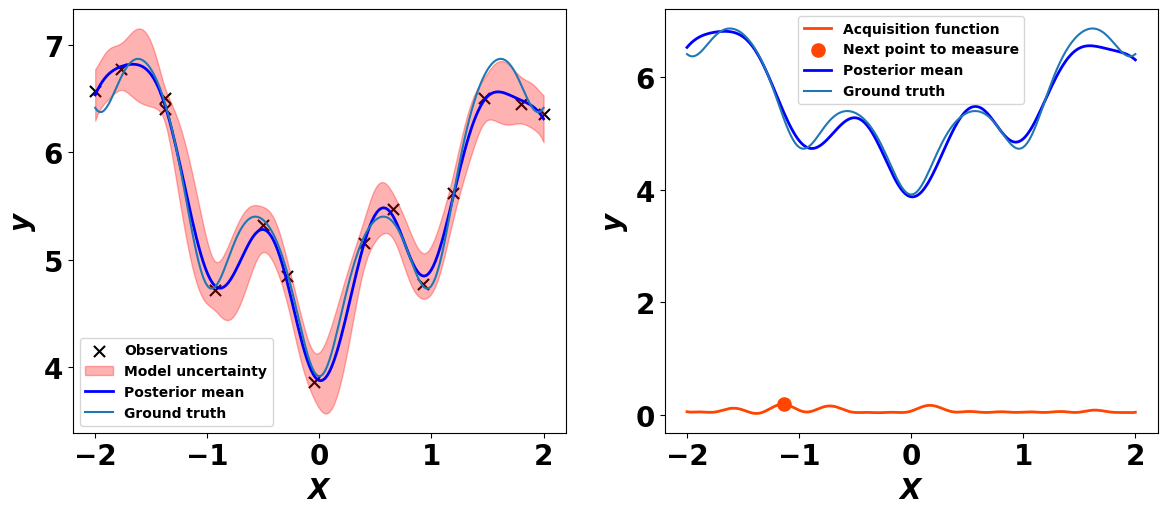

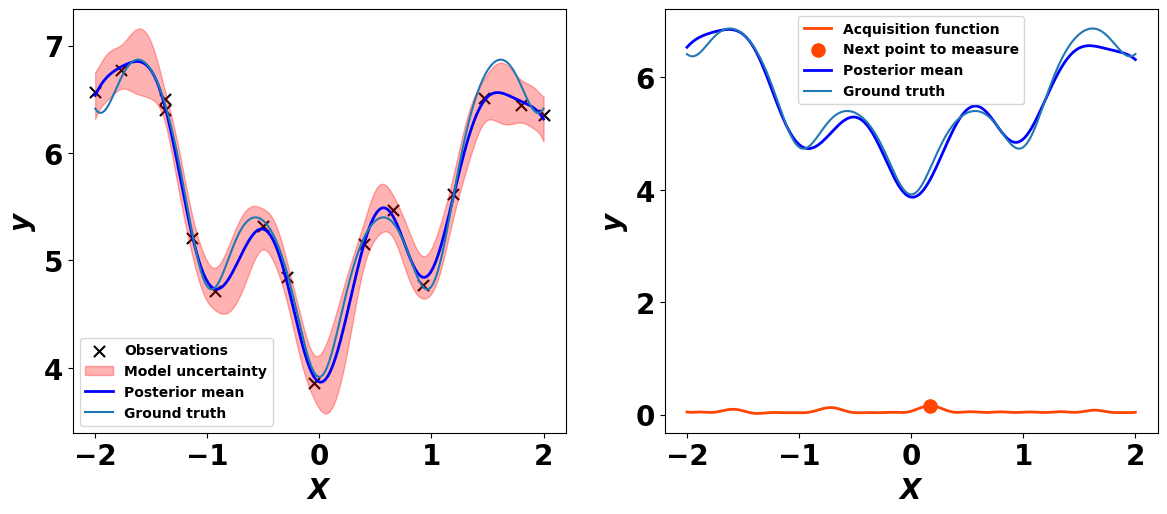

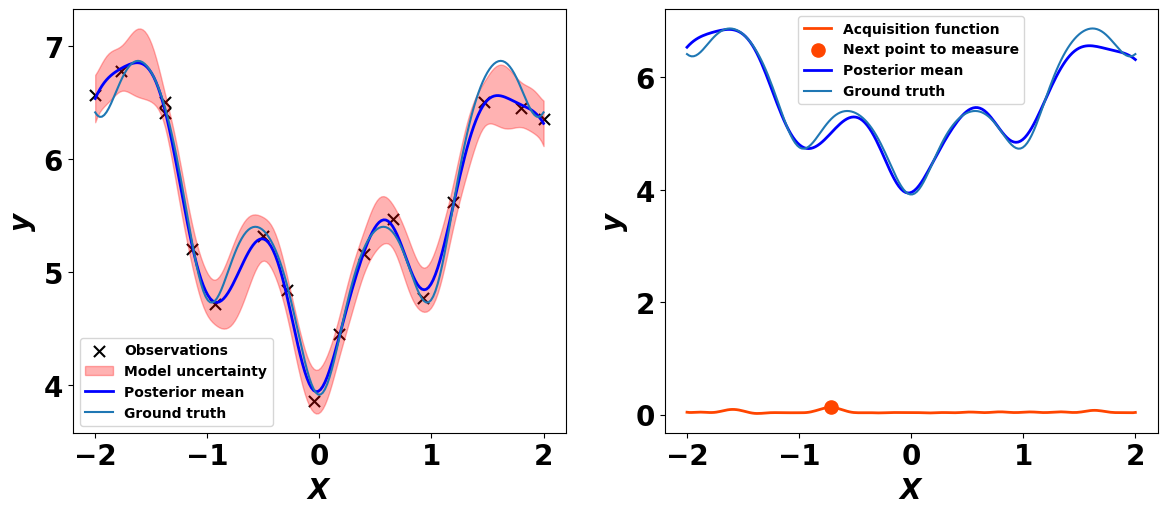

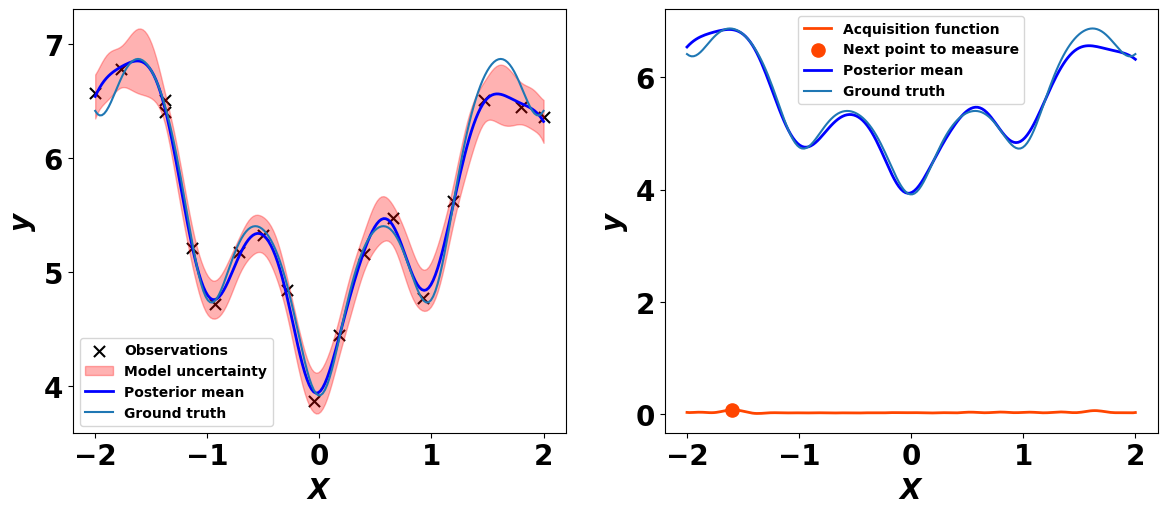

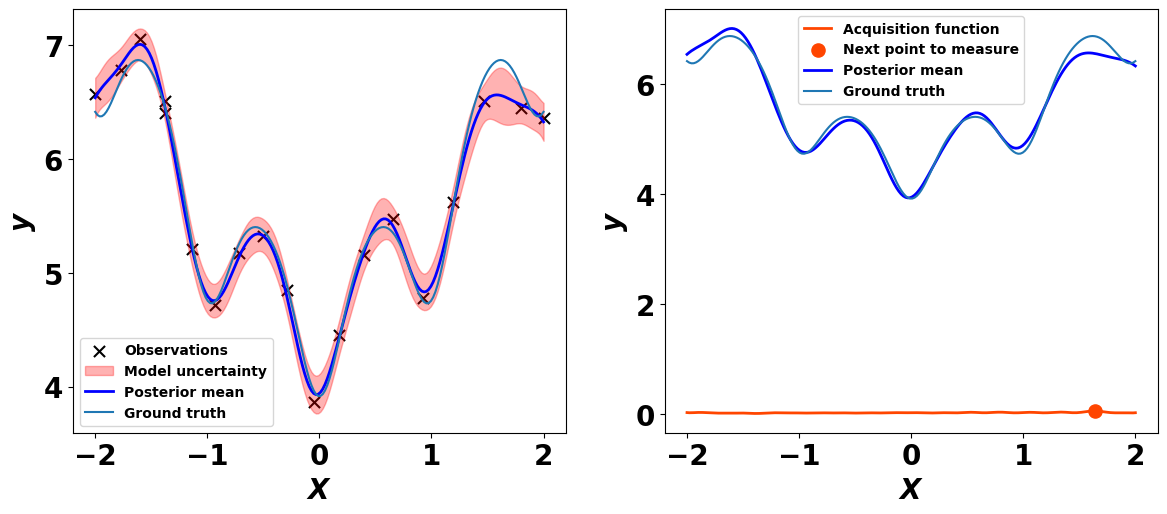

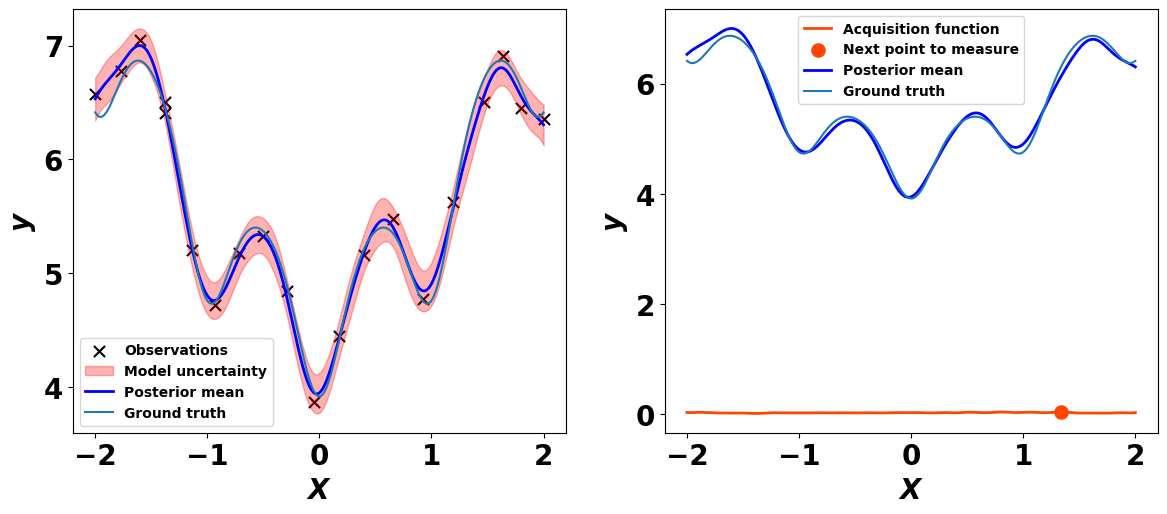

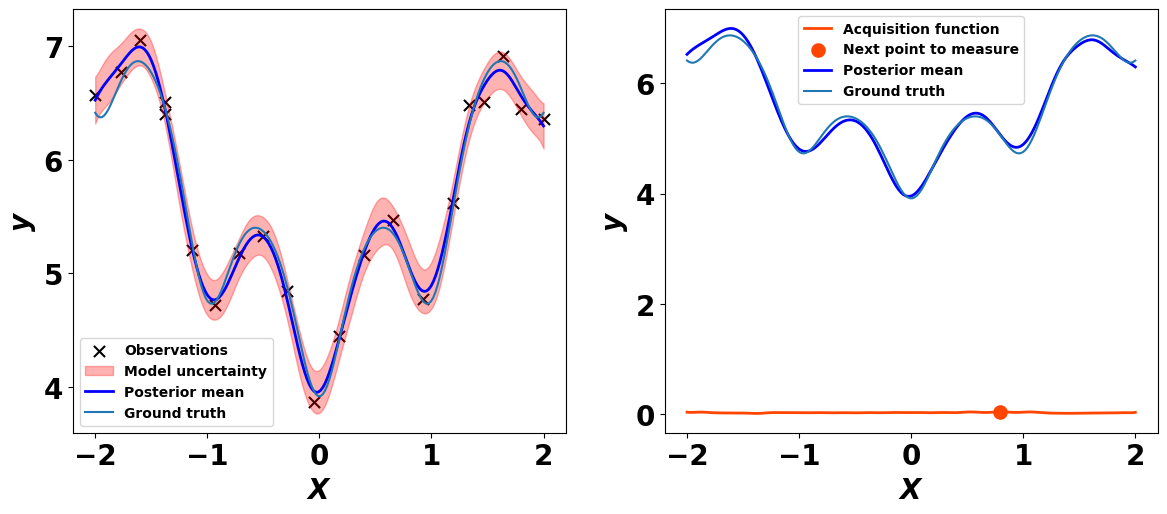

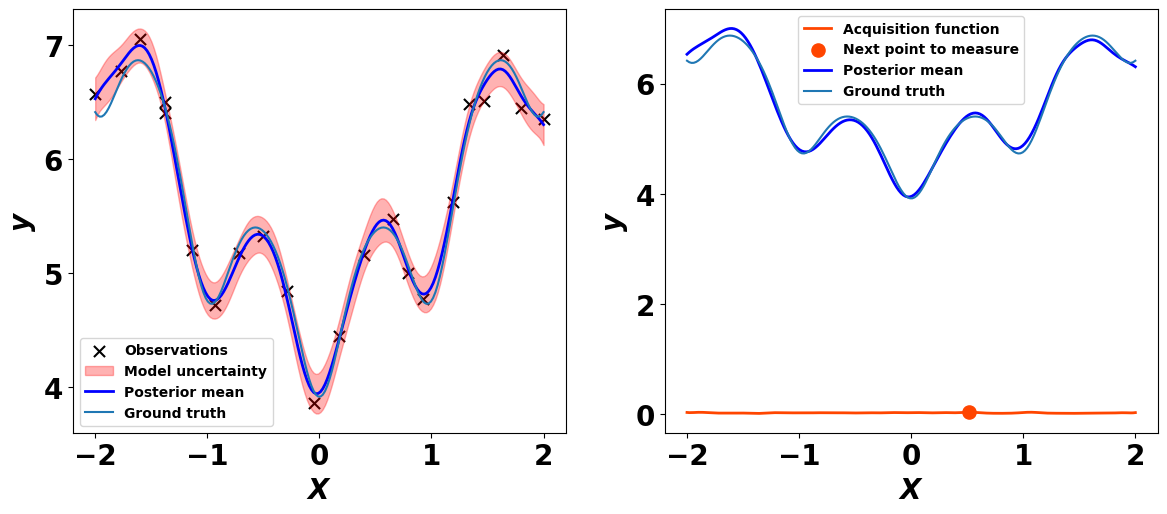

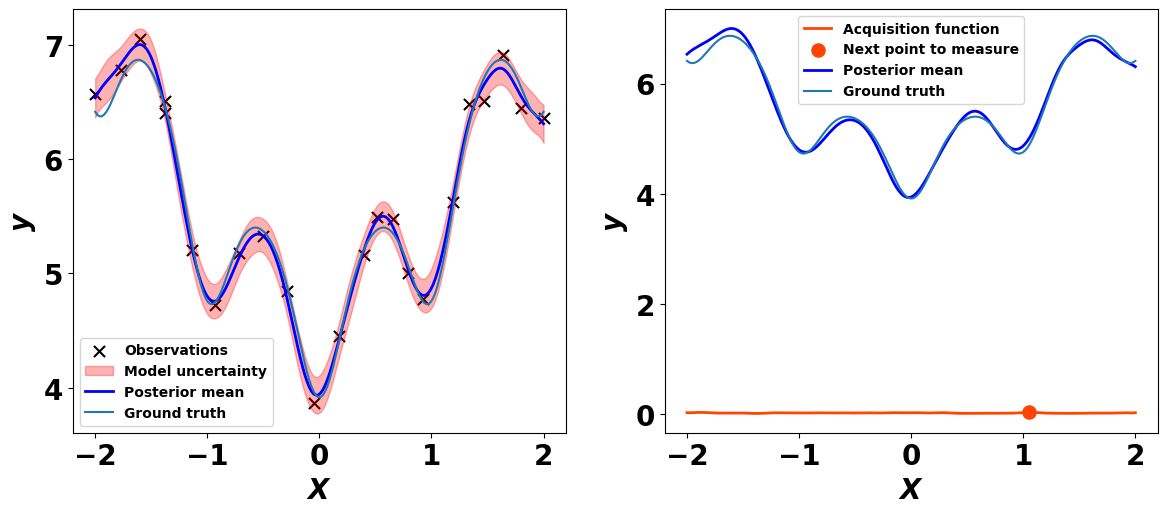

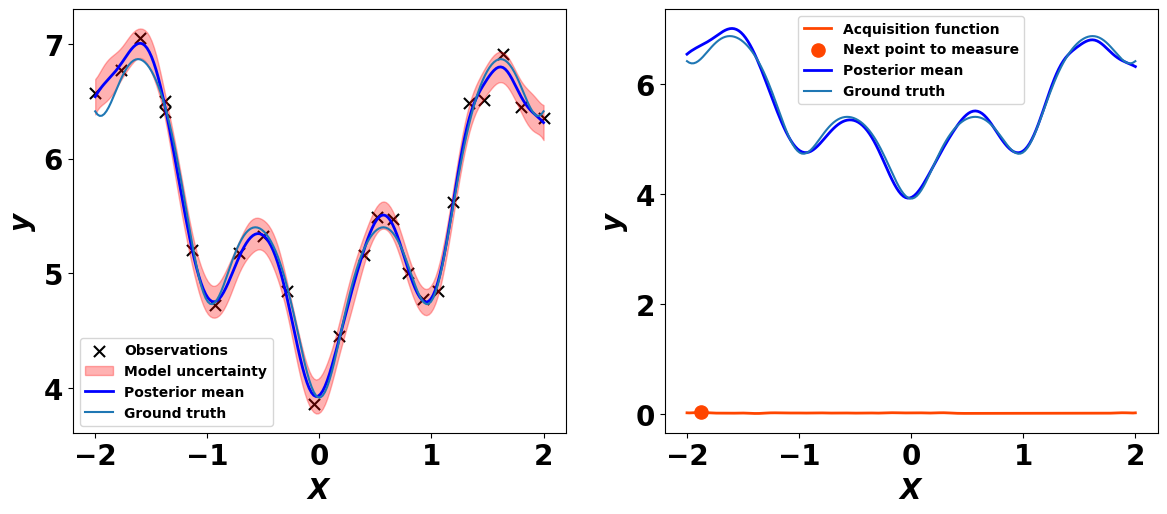

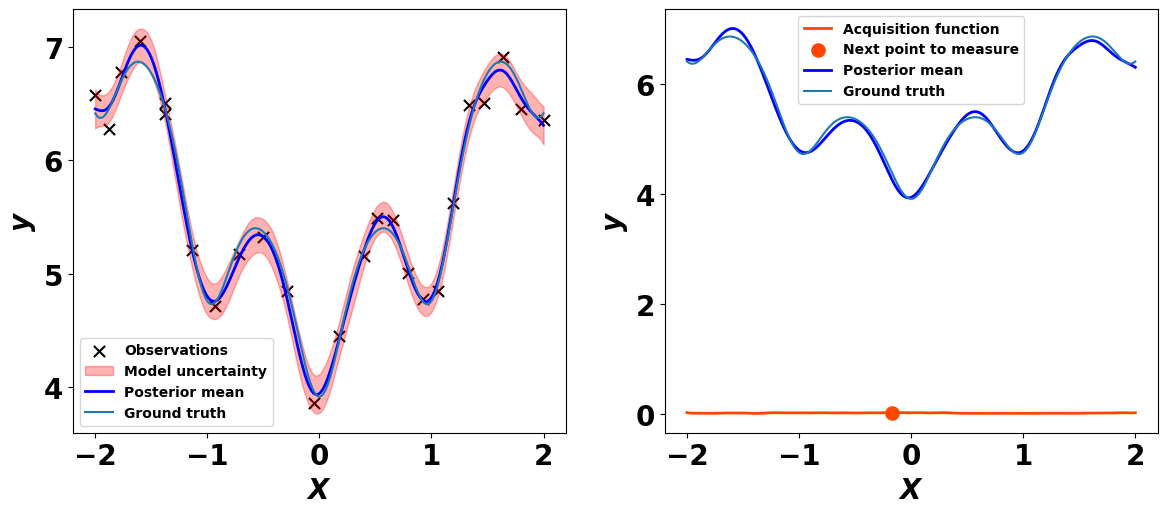

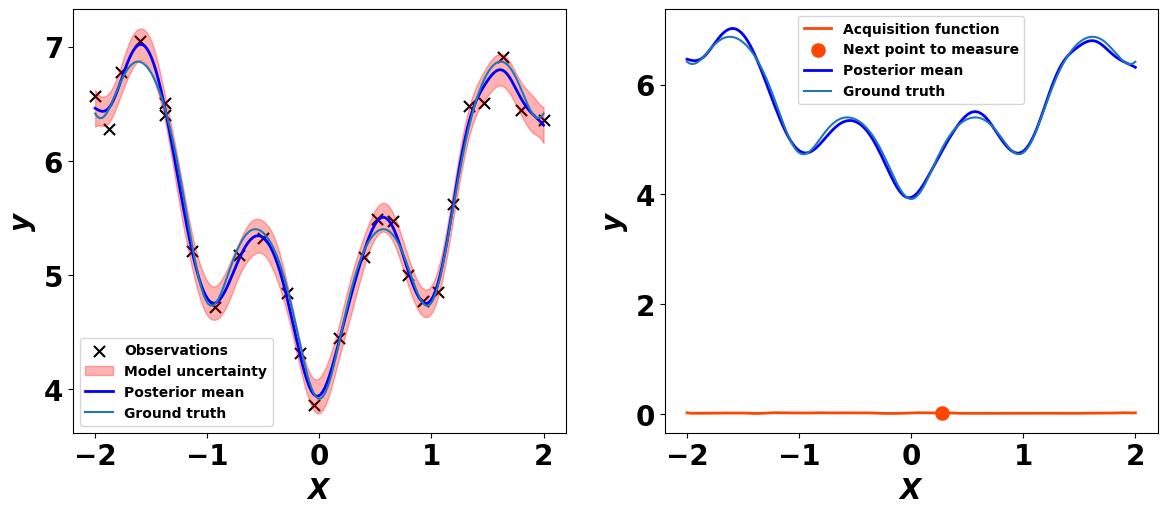

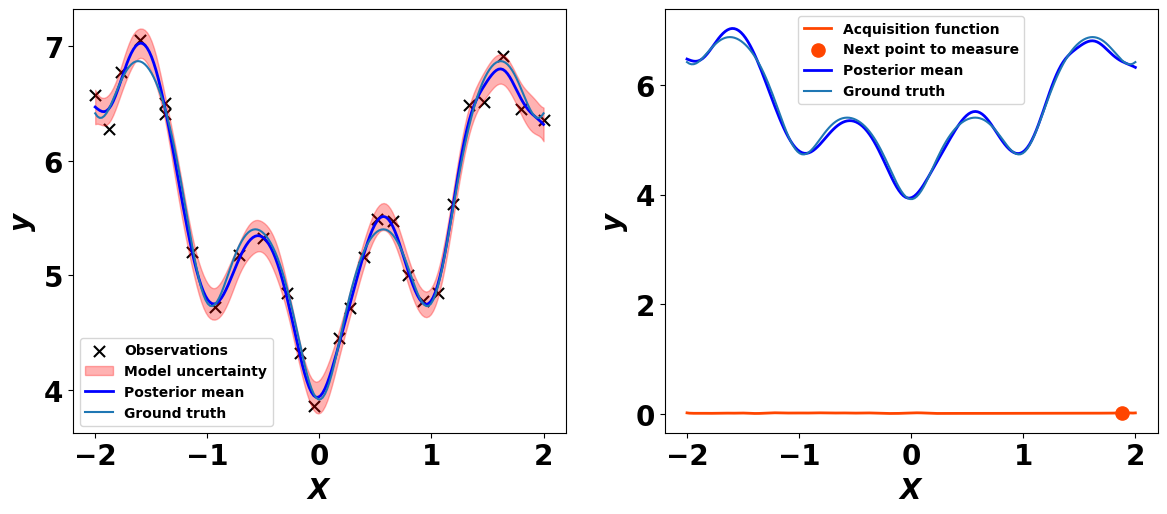

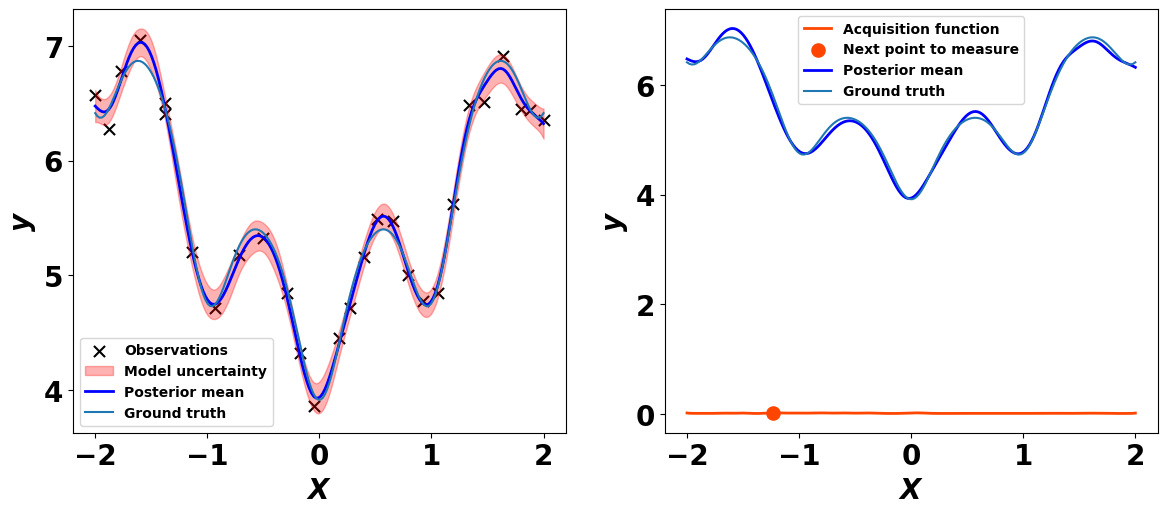

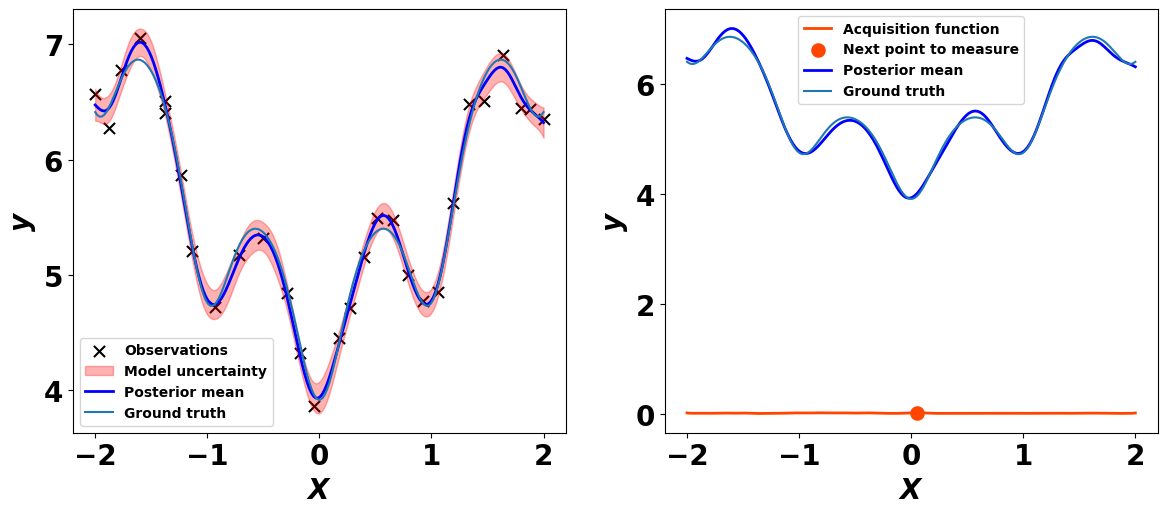

In [ ]:
os.chdir("/content/sGP2/sGP/NoisePrior2_KernelLength7")

for i in range (20):
  #load results
  s = np.load("step{}.npz".format(i))
  X = s['X'];
  y = s["y"];
  y_pred = s["y_pred"];
  y_sampled = s["y_sampled"]
  X_unmeasured = s["X_unmeasured"]
  acq = s["acq"]
  idx = s["idx"]
  #ground truth saved in the step file is not correct, so we need to get groun truth here
  ground_truth = measure(X_unmeasured, noise=0)

  #plot figures
  lower_b = y_pred - y_sampled.std(axis=(0,1))
  upper_b = y_pred + y_sampled.std(axis=(0,1))
  fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(14, 5.5))
  ax1.scatter(X[:-1], y[:-1], marker='x', c='k', label="Observations", s=64)
  ax1.fill_between(X_unmeasured, lower_b, upper_b, color='r', alpha=0.3, label="Model uncertainty")
  ax2.plot(X_unmeasured, acq, lw=2, c='orangered', label='Acquisition function')
  ax2.scatter(X_unmeasured[idx], acq[idx], s=90, c='orangered', label='Next point to measure')
  for ax in fig.axes:
    ax.plot(X_unmeasured, y_pred, lw=2, c='b', label='Posterior mean')
    ax.plot(X_unmeasured, ground_truth, label='Ground truth')
    #ax.set_ylim(3.0, 8)
    ax.set_xlabel("$X$")
    ax.set_ylabel("$y$")
    ax.legend(loc='best', fontsize=10)
  plt.show()


# Analysis 2--Fixed Kernel Length, change Noise Prior and Data Noise

In [ ]:
os.chdir('/content/sGP_noise/sGP_noise')

#here is the noise list and kernel list we used in sGP analysis
#the more detailed parameters can be found in the .py notebook in sGP folder.
noise_data_list = np.linspace(0, 1, 15)
noise_prior_list = np.logspace(-1, 1, 15)

Plot undertainty and MSE

<ipython-input-35-5f3696254899>:5: RuntimeWarning: divide by zero encountered in log10
  xticklabels=np.log10(noise_data_list).round(2),


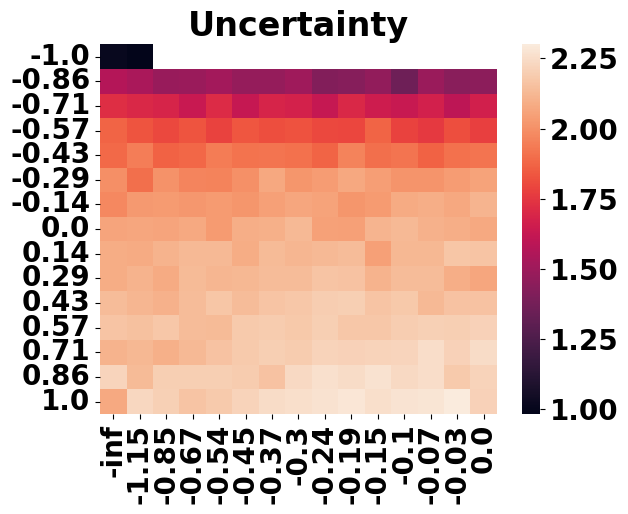

<ipython-input-35-5f3696254899>:13: RuntimeWarning: divide by zero encountered in log10
  xticklabels=np.log10(noise_data_list).round(2),


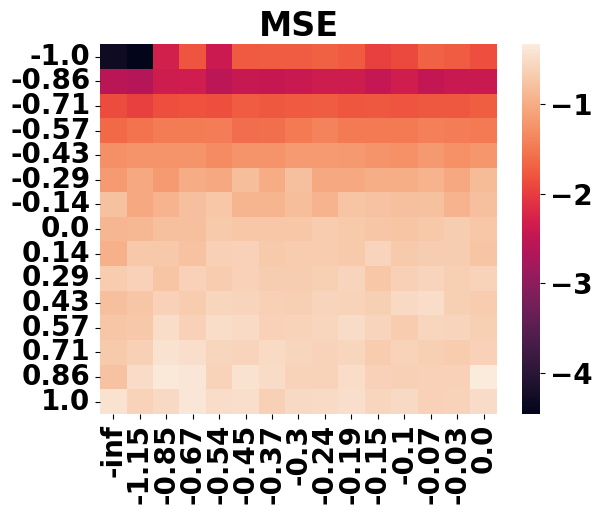

In [ ]:
all_uncertainty = np.load("/content/sGP_noise/sGP_noise/all_uncertainty.npy")
fig, ax = plt.subplots()
ax.set_title("Uncertainty")
ax = sns.heatmap(np.log10(all_uncertainty[-1,:,:]),
                 xticklabels=np.log10(noise_data_list).round(2),
                 yticklabels=np.log10(noise_prior_list).round(2))
plt.show()

all_mse = np.load("/content/sGP_noise/sGP_noise/all_mse.npy")
fig, ax = plt.subplots()
ax.set_title("MSE")
ax = sns.heatmap(np.log10(all_mse[-1,:,:]),
                 xticklabels=np.log10(noise_data_list).round(2),
                 yticklabels=np.log10(noise_prior_list).round(2))

If you want to check the training process of a certain noise prior and kernel length, you can chnage the directory below

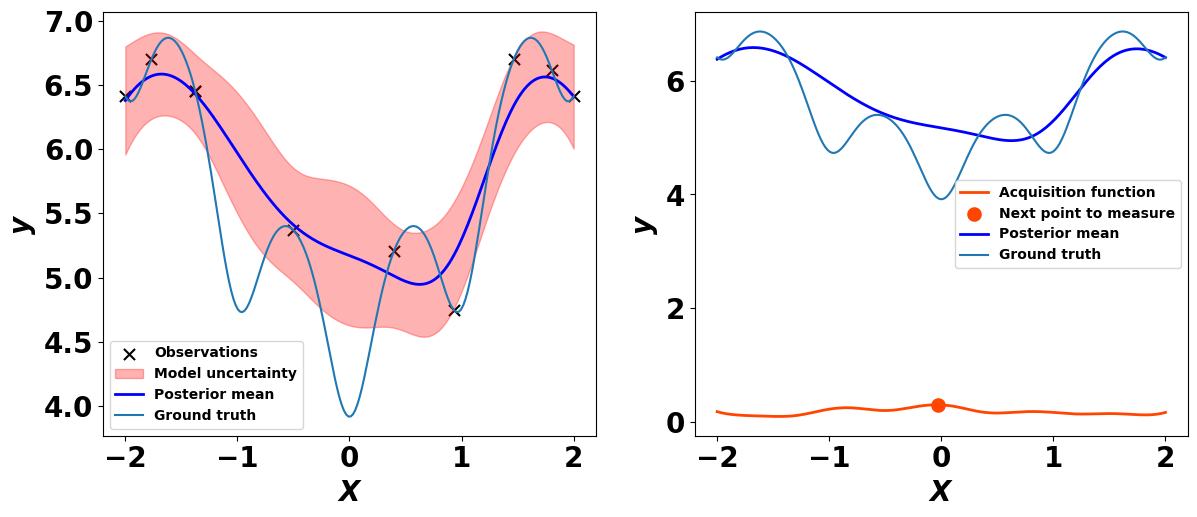

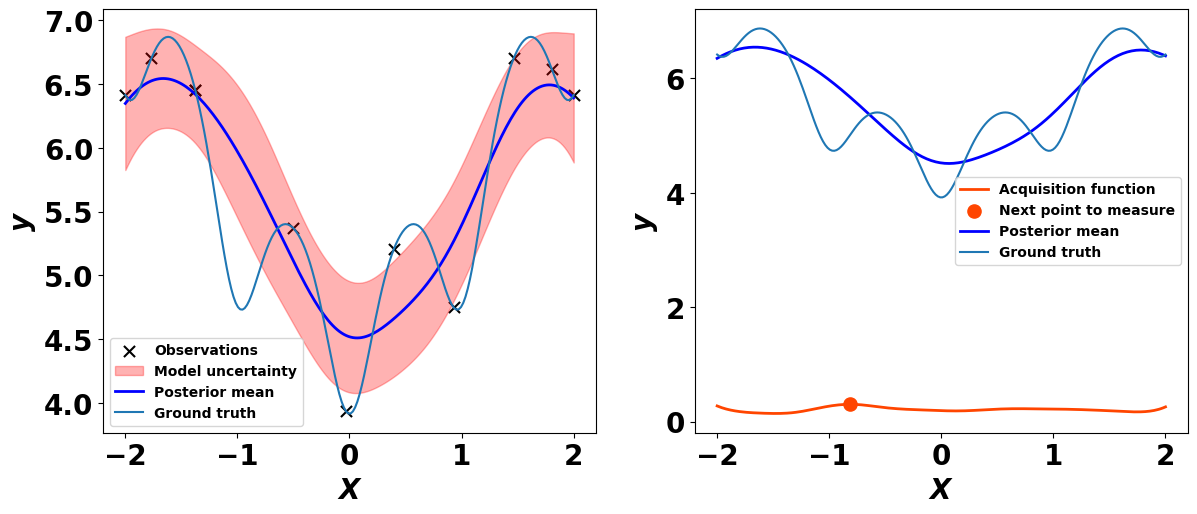

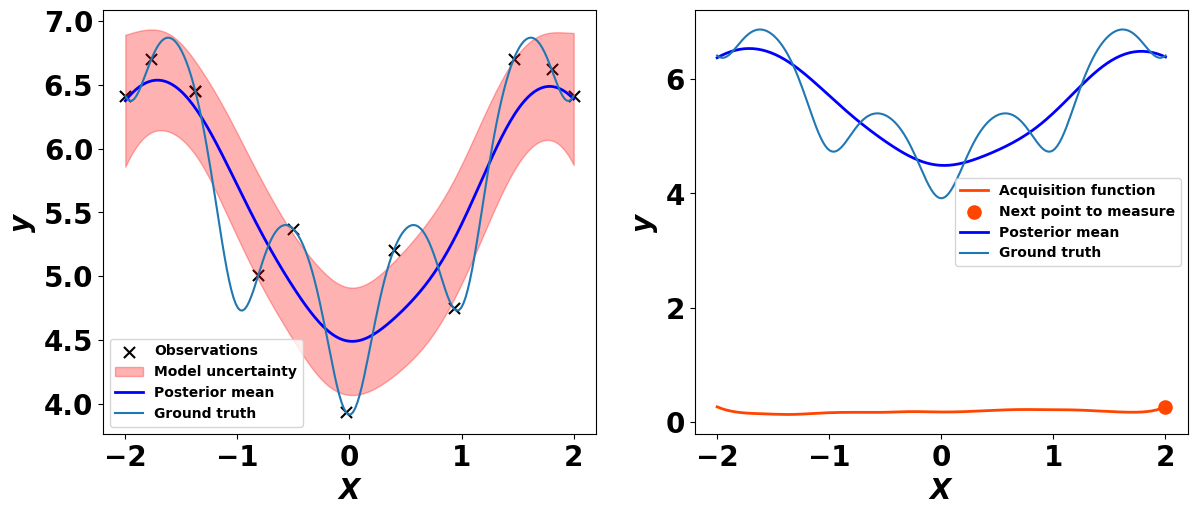

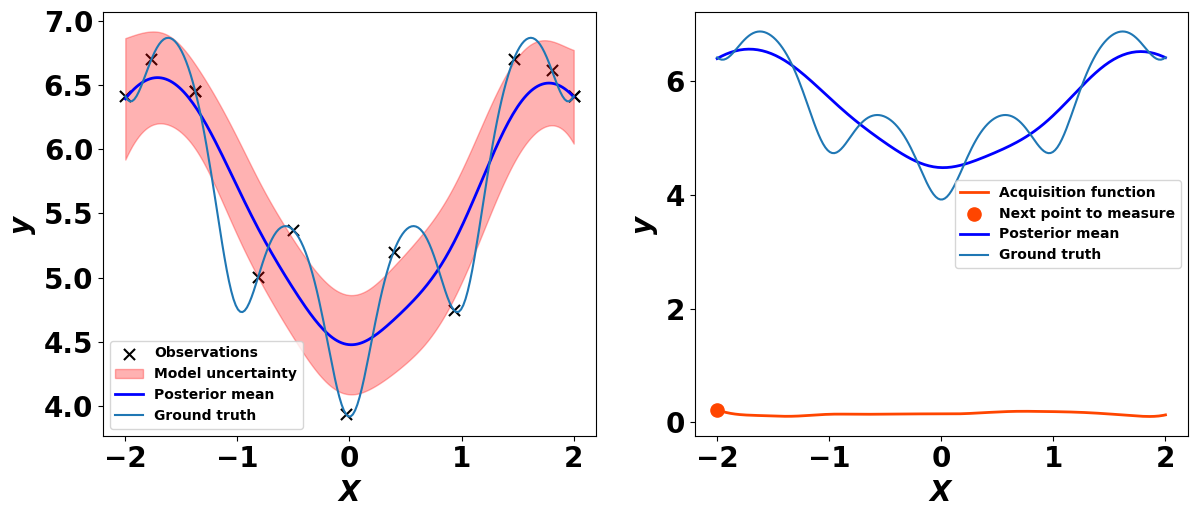

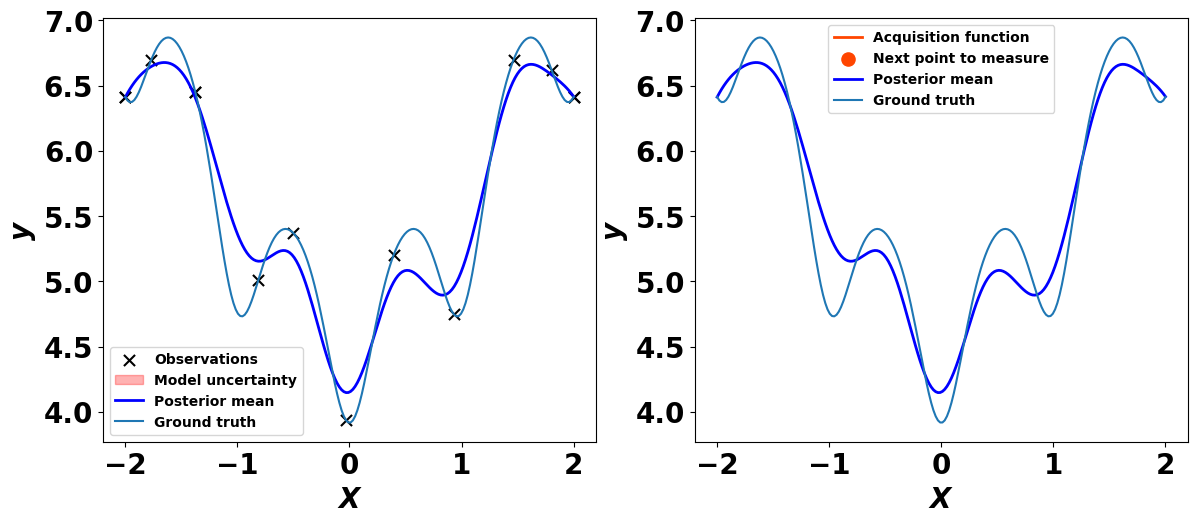

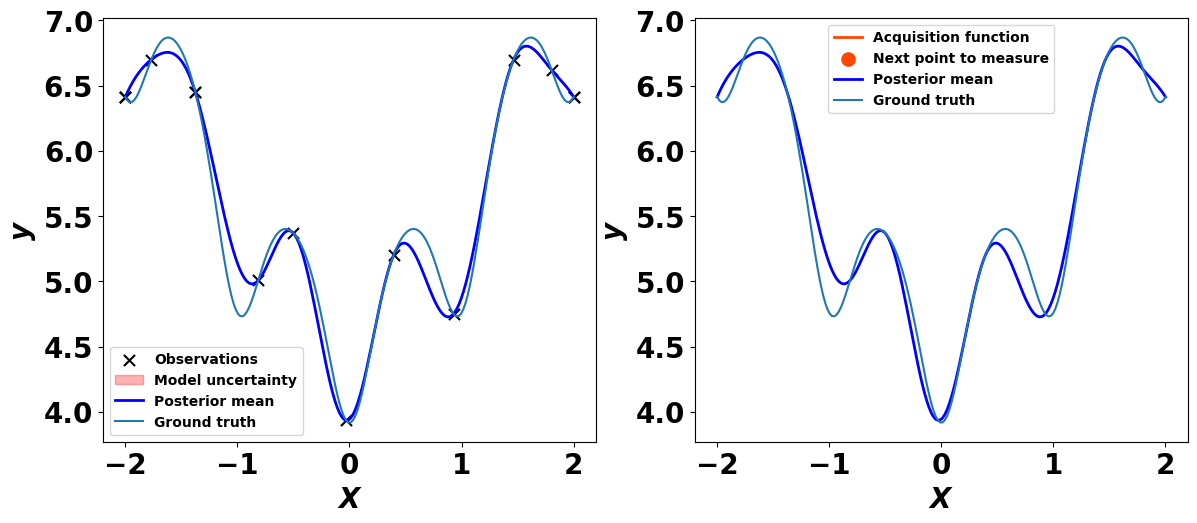

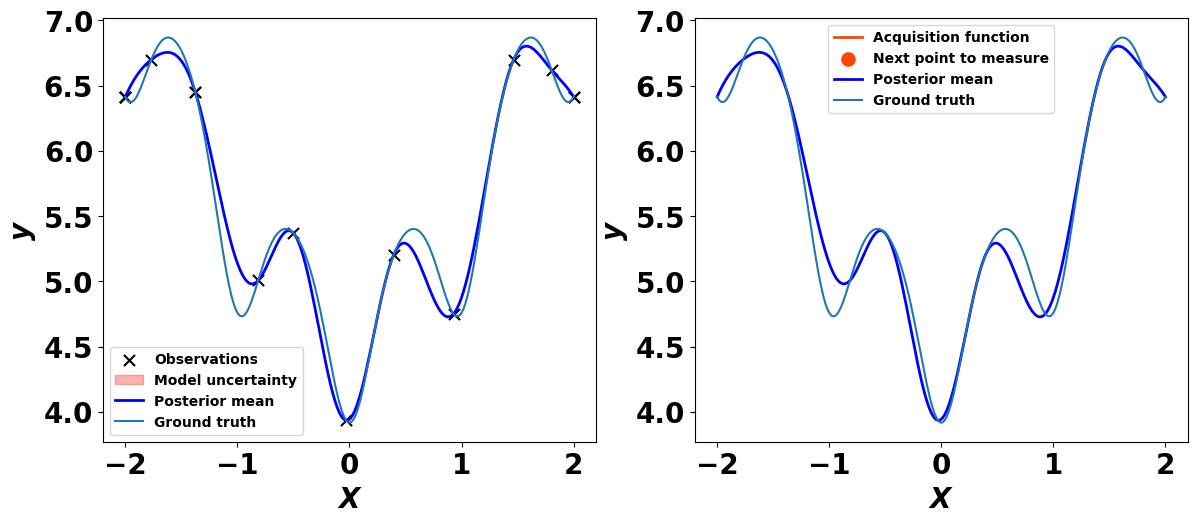

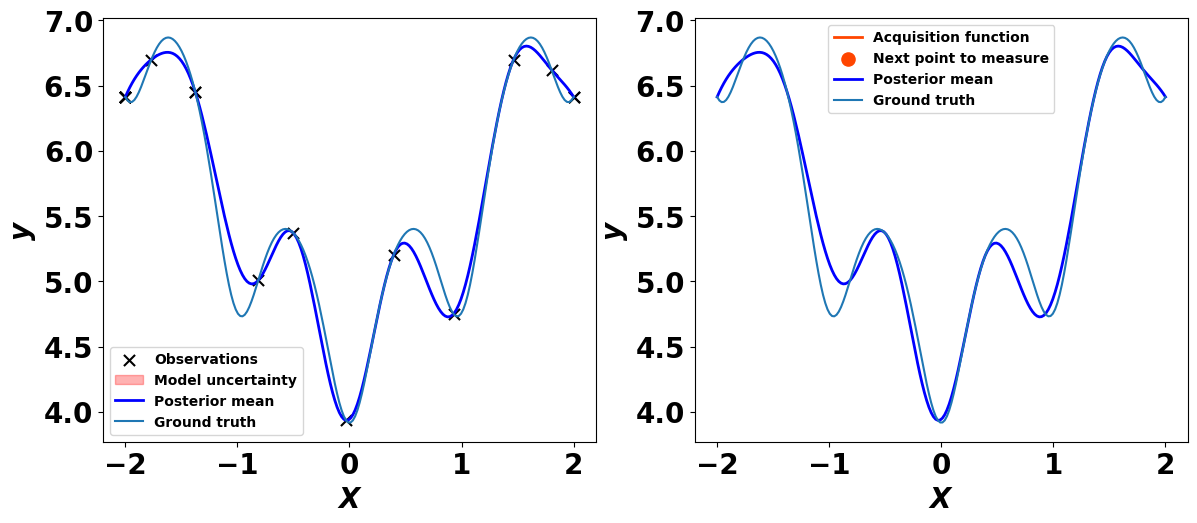

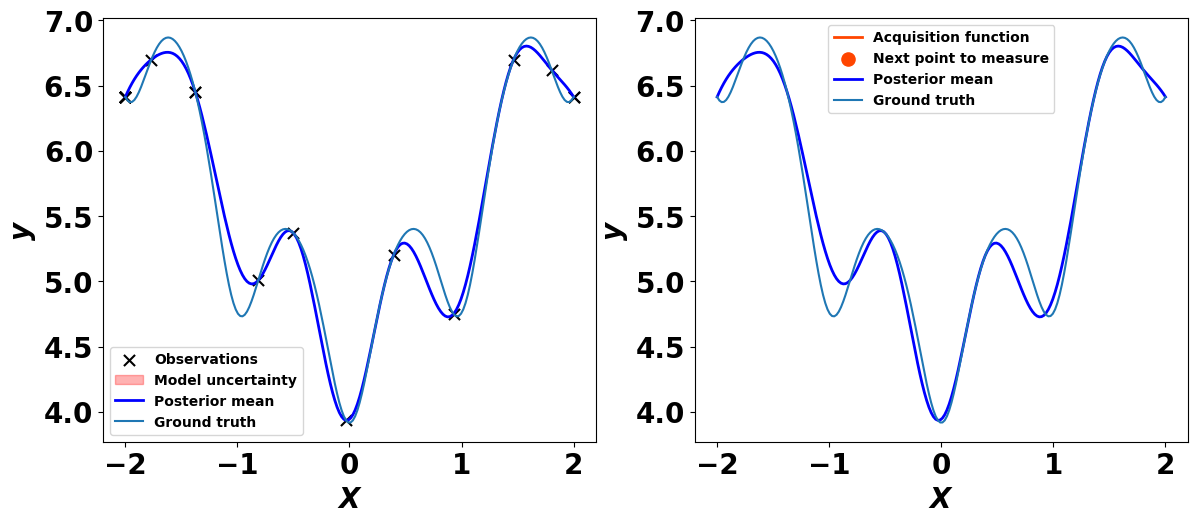

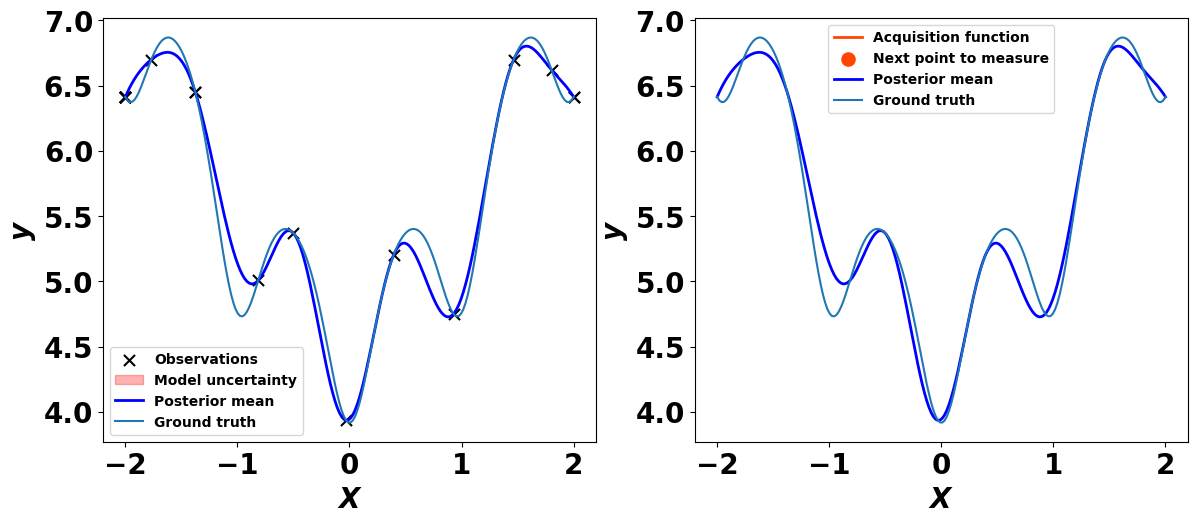

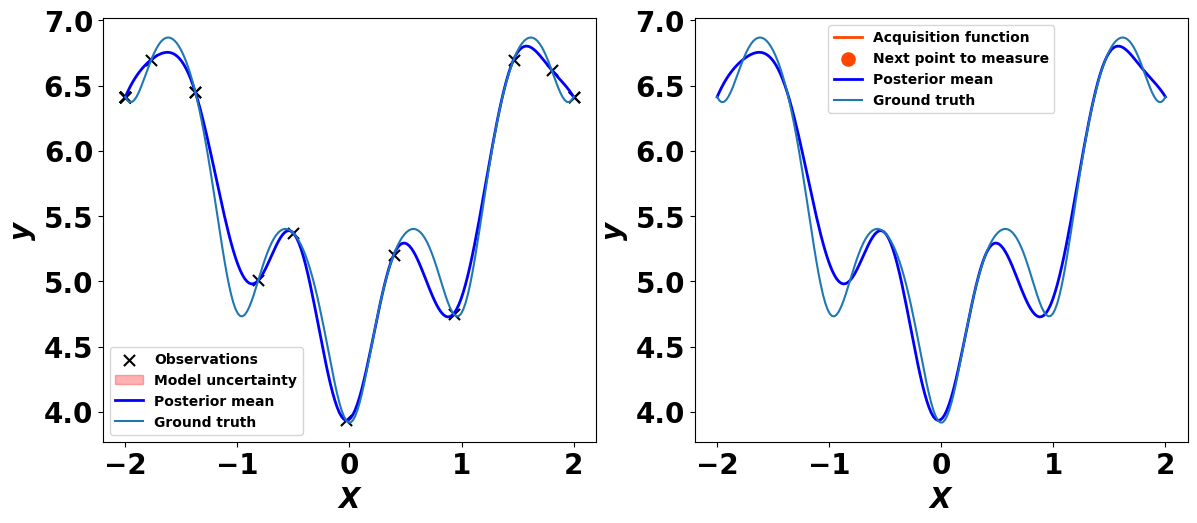

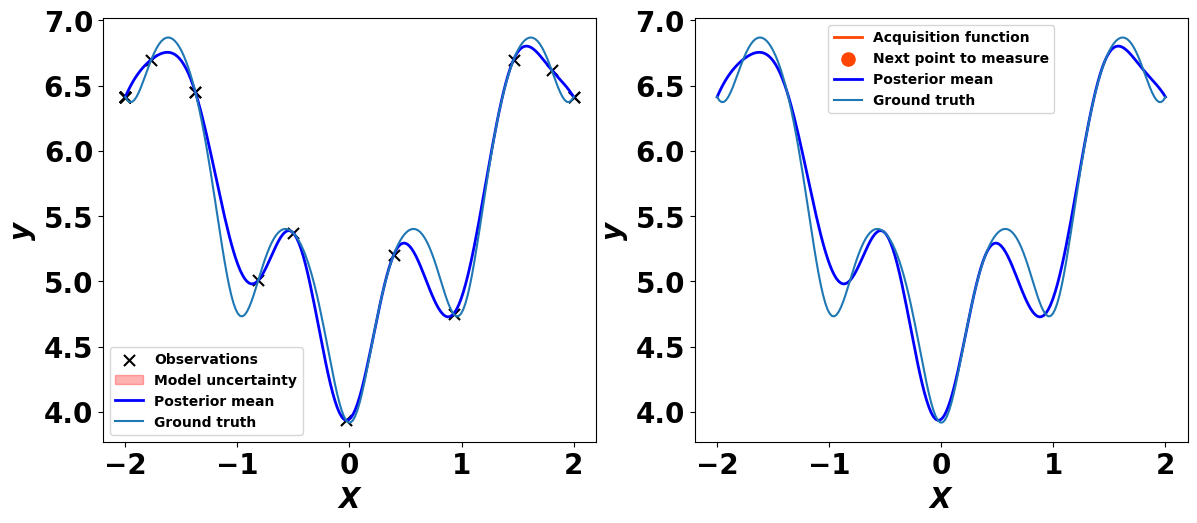

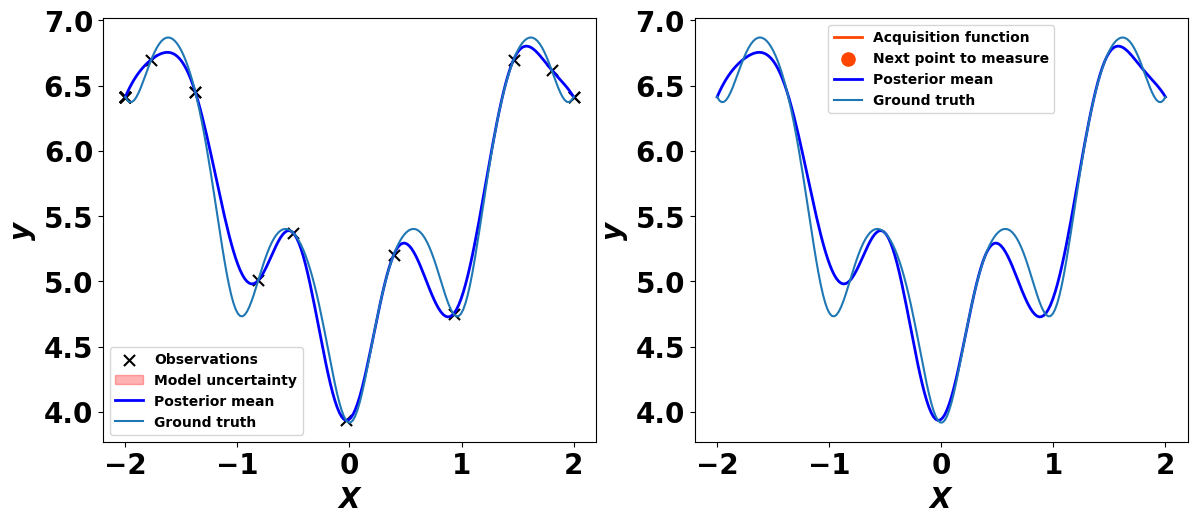

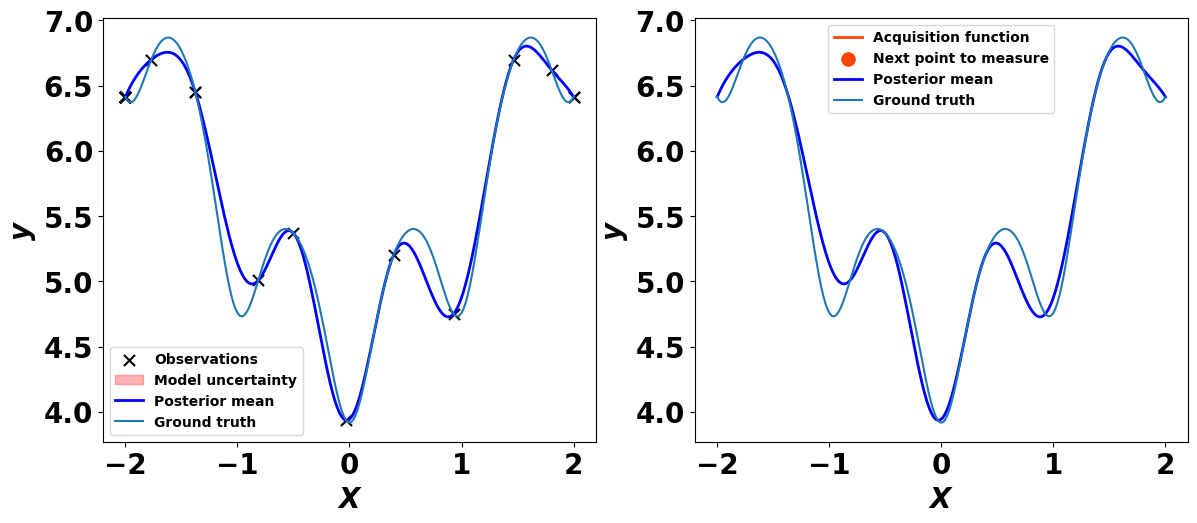

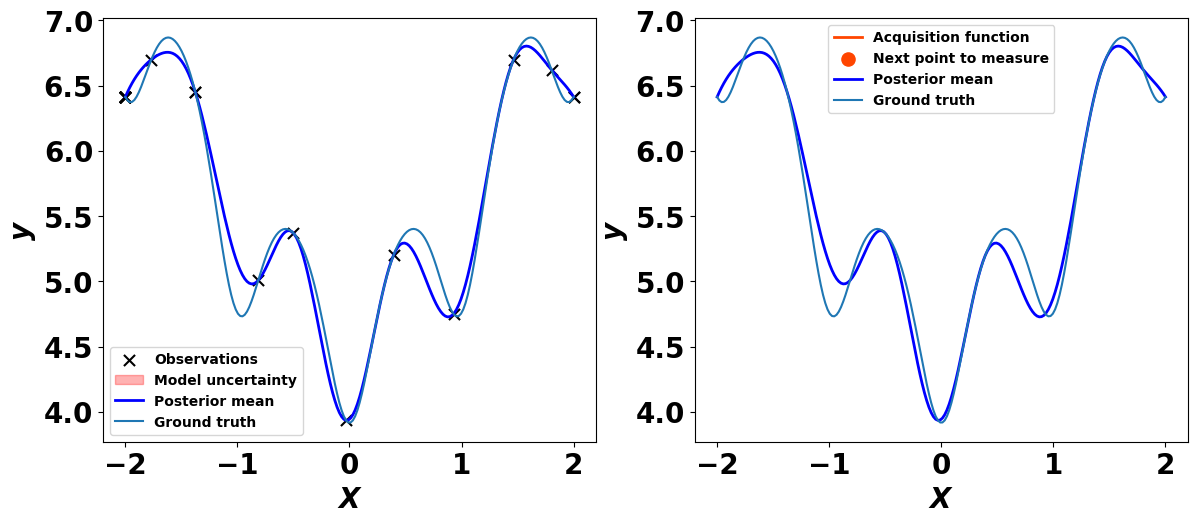

In [ ]:
os.chdir("/content/sGP_noise/sGP_noise/NoisePrior8_NoiseData0")

for i in range (15):
  #load results
  s = np.load("step{}.npz".format(i))
  X = s['X'];
  y = s["y"];
  y_pred = s["y_pred"];
  y_sampled = s["y_sampled"]
  X_unmeasured = s["X_unmeasured"]
  acq = s["acq"]
  idx = s["idx"]
  #ground truth saved in the step file is not correct, so we need to get groun truth here
  ground_truth = measure(X_unmeasured, noise=0)

  #plot figures
  lower_b = y_pred - y_sampled.std(axis=(0,1))
  upper_b = y_pred + y_sampled.std(axis=(0,1))
  fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(14, 5.5))
  ax1.scatter(X[:-1], y[:-1], marker='x', c='k', label="Observations", s=64)
  ax1.fill_between(X_unmeasured, lower_b, upper_b, color='r', alpha=0.3, label="Model uncertainty")
  ax2.plot(X_unmeasured, acq, lw=2, c='orangered', label='Acquisition function')
  ax2.scatter(X_unmeasured[idx], acq[idx], s=90, c='orangered', label='Next point to measure')
  for ax in fig.axes:
    ax.plot(X_unmeasured, y_pred, lw=2, c='b', label='Posterior mean')
    ax.plot(X_unmeasured, ground_truth, label='Ground truth')
    #ax.set_ylim(3.0, 8)
    ax.set_xlabel("$X$")
    ax.set_ylabel("$y$")
    ax.legend(loc='best', fontsize=10)
  plt.show()
